# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [4]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [5]:
table_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
le = LabelEncoder()
table_data['species'] = le.fit_transform(table_data['species'])

In [8]:
X = table_data.drop('species', axis=1)
y = table_data['species']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=10)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [10]:
test_idx

array([459,  32, 670, 528, 756, 505, 168, 770, 695, 679, 617, 185, 436,
       660, 602,  30, 947, 174, 268, 941, 134, 486,  63, 233, 106, 678,
       170, 380, 331, 311, 818, 760, 931, 988, 412, 180, 291, 220,  14,
       914, 716, 203, 646, 649, 952, 410, 453, 498, 682, 417, 512, 191,
         6, 269,  71, 482, 402, 734, 198, 571, 141,  50, 369, 439, 889,
       222, 210, 426, 428, 533, 230, 903, 152, 218, 129, 404, 799, 499,
       746, 201, 566, 472, 706, 281, 534, 662, 538, 323, 305, 788, 362,
       582, 187, 677, 378, 641, 732,  60, 133, 109, 194, 778, 954,  59,
       205, 828, 387, 551, 489, 611,  11, 449, 431,  81, 615, 579, 450,
       480, 985, 856,   4, 930, 547, 713, 925, 383,  42,  24, 192, 705,
       328, 691, 757, 157, 739, 474, 289, 121, 423, 118,  75, 574, 829,
       370, 630, 819, 976, 316, 430, 213, 182, 814, 476, 379, 442, 738,
       382, 264, 576, 896, 981,  18, 104, 267, 409,  91, 822, 667, 156,
       589, 768, 880, 868, 569, 392, 601, 150, 621, 775, 360, 80

In [11]:
y_test.value_counts()

98    2
24    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    2
43    2
44    2
45    2
46    2
25    2
23    2
48    2
22    2
1     2
2     2
3     2
     ..
93    2
94    2
95    2
96    2
75    2
73    2
50    2
72    2
51    2
52    2
53    2
54    2
55    2
56    2
57    2
58    2
59    2
60    2
61    2
62    2
63    2
64    2
65    2
66    2
67    2
68    2
69    2
70    2
71    2
0     2
Name: species, Length: 99, dtype: int64

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [12]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


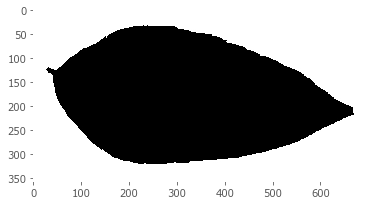

In [13]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [14]:
from skimage.transform import resize

In [15]:
img_resized = resize(img, (100, 100))

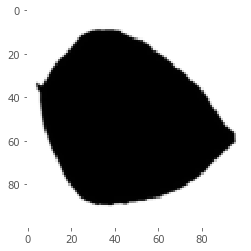

In [16]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [17]:
images = os.listdir(IMG_DIR)
vec_image = np.zeros(shape=(len(images), 10000))

for i, image in enumerate(images):
    vec_image[i] = np.ravel(resize(plt.imread(os.path.join(IMG_DIR, image)), (100, 100)))

In [18]:
imgs_train = np.zeros(shape=(len(y_train), 10000))
imgs_test = np.zeros(shape=(len(y_test), 10000))
for i in range(len(train_idx)):
    for j in range(len(images)):
        if images[j]==(str(train_idx[i])+'.jpg'):
            imgs_train[i]=vec_image[j]

for i in range(len(test_idx)):
    for j in range(len(images)):
        if images[j]==(str(train_idx[i])+'.jpg'):
            imgs_test[i]=vec_image[j]

Я не понимаю, почему код в окошке выше проработал так быстро. Стойкое ощущение, что что-то где-то не так, хотя все матрицы с закодированными изображениями выдают нормальные результаты и я проверял верность проверяемых условий...

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

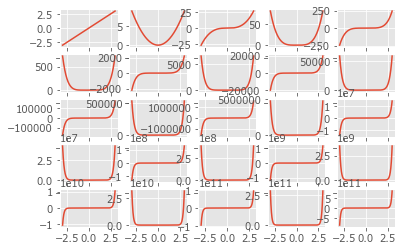

In [19]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

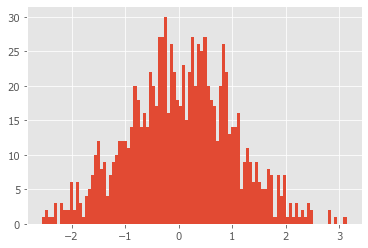

In [20]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

IndexError: index 792 is out of bounds for axis 0 with size 792

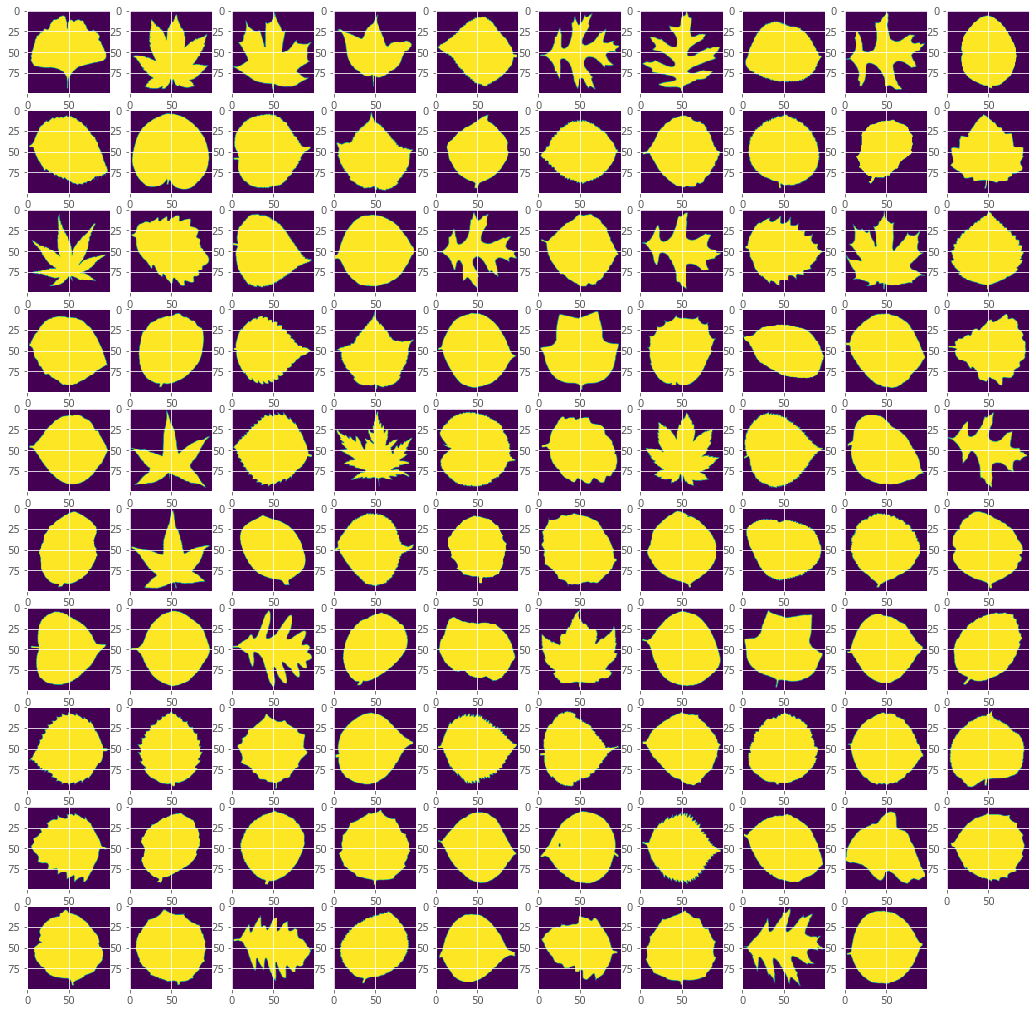

In [21]:
plt.figure(figsize=(18, 18))
already_drawn=[]
for j in range(len(table_data)):
    if y_train.to_numpy()[j] not in already_drawn:
        already_drawn.append(y_train.to_numpy()[j])
        plt.subplot(10, 10, len(already_drawn))
        plt.imshow(imgs_train[j].reshape(100, 100))

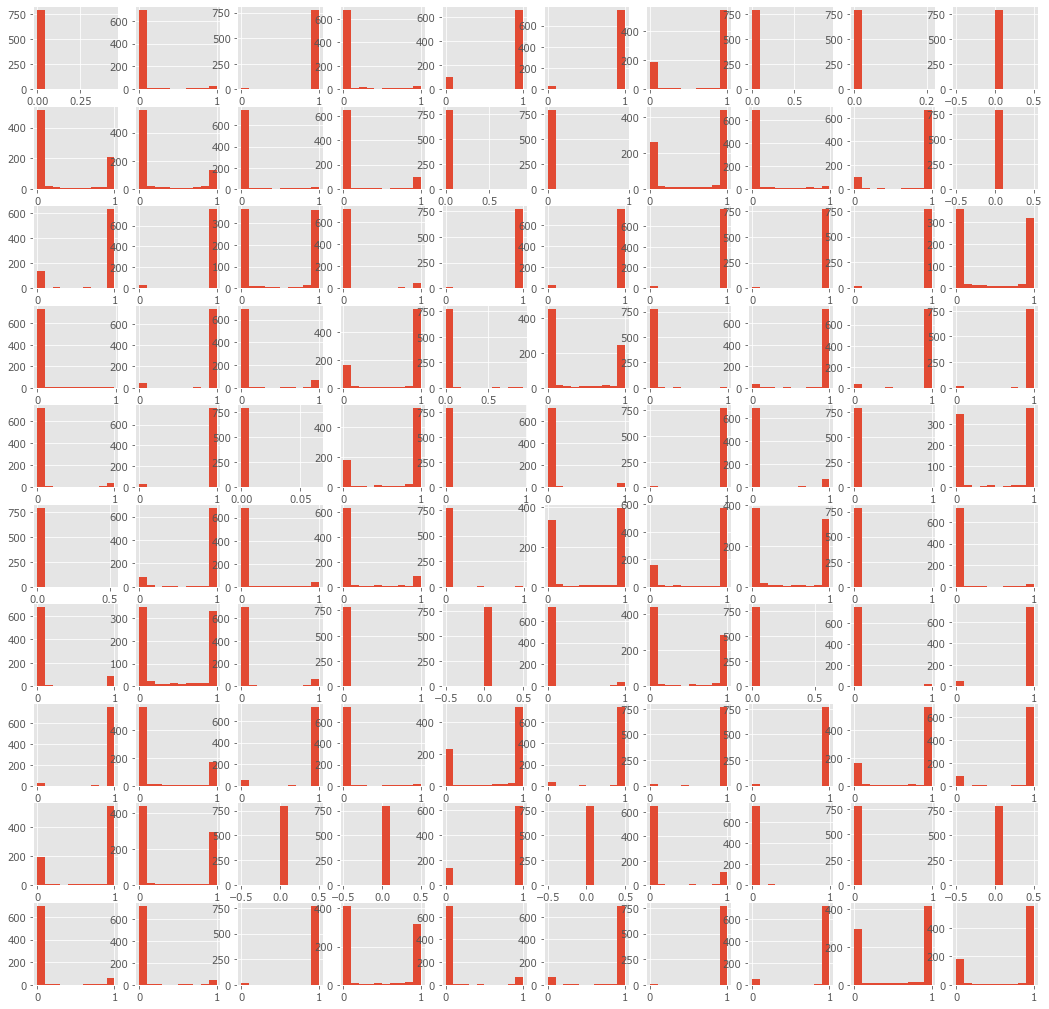

In [22]:
#Может быть я неверно понял условие задачи, но так и не понял, зачем ухищряться здесь с np.vectorize
plt.figure(figsize=(18, 18))
rand = np.random.randint(1, 10001, 100)
for i in range(len(rand)):
    plt.subplot(10, 10, i+1)
    plt.hist(imgs_train[:, rand[i]])

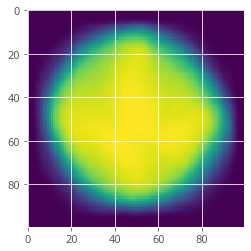

In [23]:
a=np.zeros(shape=(1, 10000))
for i in range(10000):
    a[0, i] = imgs_train[:, i].mean()
a=a.reshape(100, 100)
plt.imshow(a)

In [24]:
#Много ли пикселей, которые всегда принимают одно и то же значение - да, достаточно!
np.where(a>0.99)

(array([42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44,
        44, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46,
        46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48,
        48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53,
        53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54,
        54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
        55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57,
        57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58,
        58, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 61,
        61, 61, 61, 61, 62, 62, 62, 62, 62, 63, 63, 63, 64, 64, 65, 66],
       dtype=int64),
 array([46, 47, 48, 49, 50, 46, 47, 48, 49, 50, 51, 46, 47, 48, 49, 50

In [25]:
print(imgs_train.min(), imgs_train.max(), imgs_train.mean(), imgs_train.std())

0.0 1.0 0.46054353037470286 0.48983706963850326


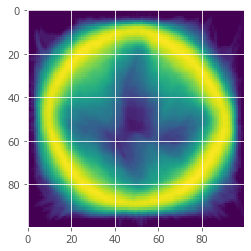

In [26]:
b=np.zeros(shape=(1, 10000))
for i in range(10000):
    b[0, i] = imgs_train[:, i].std()
b=b.reshape(100, 100)
plt.imshow(b)
#ожидаемо, наибольшее отклонение на краях листов

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

## Ответ

Да, листья отличимы по своей структуре, у некоторых более грушевидная форма, у некоторых видны зубчики, можно попробовать их кластеризовать. Очень много похожих листьев, что вызвано, надеюсь не моей ошибкой, а тем, что в наборе данных находятся похожие разновидности растений по типу клён белый, клён полевой, клён остролистный и т.д.

Они все находятся в диапазоне от 0 до 1, причём среднее значение равно 0,46, тогда как стандартное отклонение составляет 0,49, что свидетельствует о достаточно большой дисперсии, характеризующейся огромным количеством нулей в угловых пикселях и огромным количеством единиц в центральных пикселях.

В принципе, изображения можно бинаризовать, поскольку нам важен лишь силуэт листа. Вариация между 0 и 1 на изображениях, возможно, обусловлена их толщиной, которой для абсолютного большинства классов можно пренебречь, дабы облегчить будущий анализ с минимальными потерями качества. Мне кажется, следует брать порог, близкий к нулю, поскольку тонкая окантовка листа является его главной отличительной чертой, если мы выберем порог больше первого дециля толщины листьев, то мы рискуем получить кашу однообразных листьев, которые невозможно отличить друг от друга.

Средний лист, если приглядеться, может показаться обычным листом, поскольку лист любого класса имеет свои сходства, присущие всем листьям в нашем обычном представлении этого объекта. Очевидно, наиболее центральные пиксели будут одинаковыми для всех объектов.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [27]:
from sklearn.cluster import KMeans

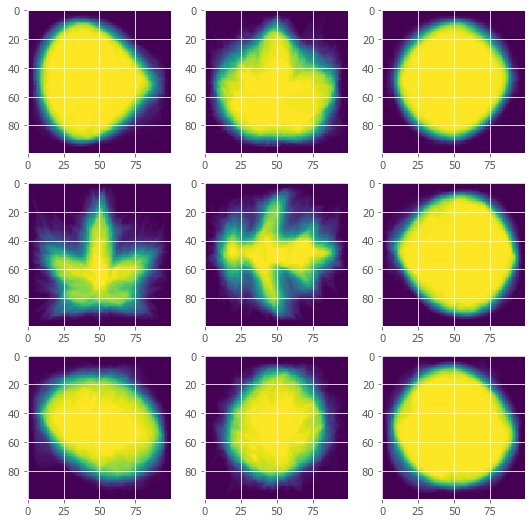

In [28]:
kmeans = KMeans(n_clusters=9, random_state=10)
center_location = kmeans.fit(imgs_train).cluster_centers_
plt.figure(figsize=(9, 9))
for i in range(len(center_location)):
    plt.subplot(3, 3, i+1)
    plt.imshow(center_location[i].reshape(100, 100))

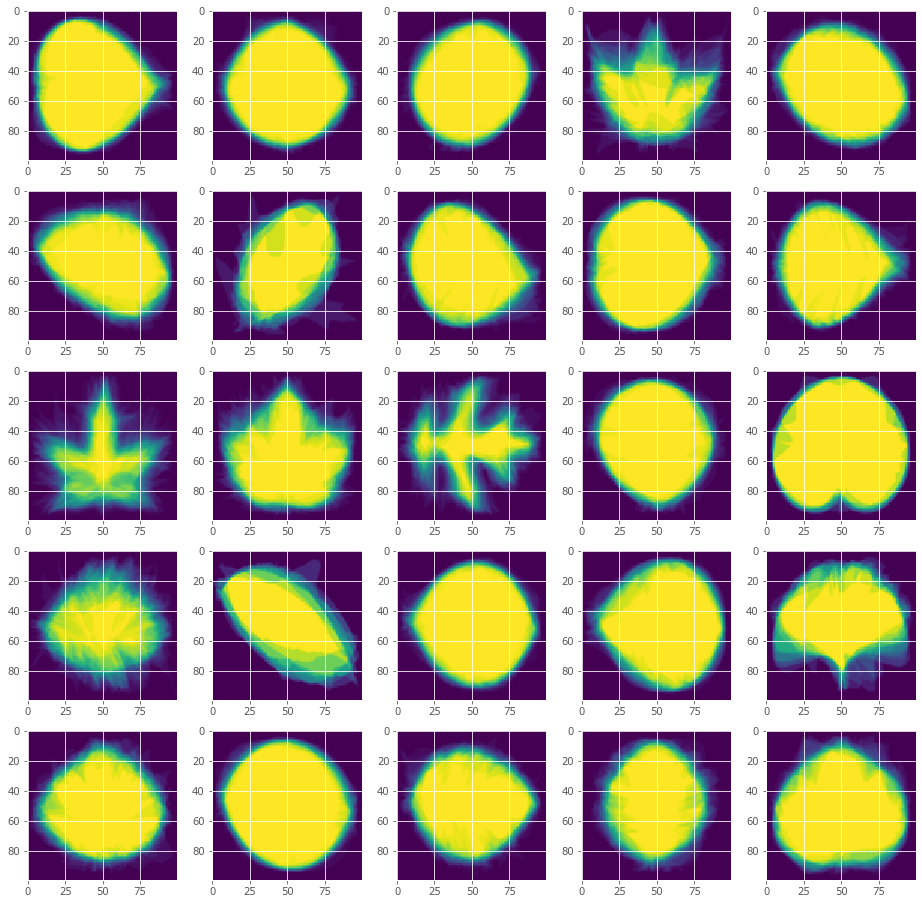

In [29]:
kmeans = KMeans(n_clusters=25, random_state=10)
center_location = kmeans.fit(imgs_train).cluster_centers_
plt.figure(figsize=(16, 16))
for i in range(len(center_location)):
    plt.subplot(5, 5, i+1)
    plt.imshow(center_location[i].reshape(100, 100))

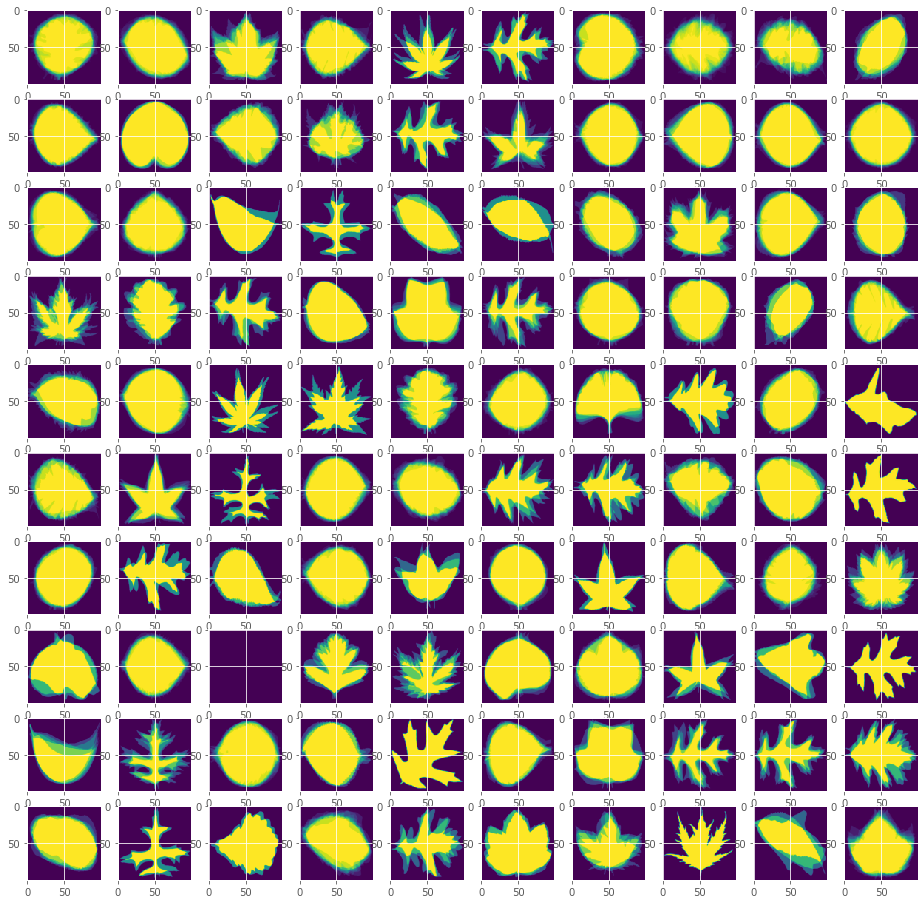

In [30]:
kmeans = KMeans(n_clusters=100, random_state=10)
center_location = kmeans.fit(imgs_train).cluster_centers_
plt.figure(figsize=(16, 16))
for i in range(len(center_location)):
    plt.subplot(10, 10, i+1)
    plt.imshow(center_location[i].reshape(100, 100))

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

## Ответ

Даже для 9 кластеров их центры весьма и весьма похожи на листья, однако при 100 кластерах большинство картинок в точности повторяют очертания клёна, дуба, марихуаны, берёзы и других листьев разных деревьев.

Картинки центров кластеров олтичаются от реальных картинок листьев по большей части своей скомканностью в некоторых местах, для случая 100 кластеров около половины картинок выглядят как лимон или картошка, которую трудно идентифицировать. Видимо, листья из разных классов размываются в одном кластере. 

Да, очень многие кластеры почти точь-в-точь повторяют друг друга, особенно это видно на случае 100 кластеров, где, если убрать все повторяющиеся кластеры, можно найти лишь около 30 уникальных классов листьев.

По идее количество кластеров должно соответствовать количеству классов листьев, однако с учётом кучи повторов в сотне кластеров, я бы сказал, что следует выбрать оптимальным количеством кластеров столько, сколько уникальных изображений есть в случае сотни кластеров (то есть около 30-35).

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [36]:
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.neighbors import NearestCentroid
CNF = NearestCentroid(random_state=10)

In [37]:
CNF.fit(imgs_train, y_train)
pred = CNF.predict(imgs_test)
accuracy_score(pred, y_test)
#аооаоаоаоаооаоао я всё сделал неправильно, ничего не работает...

0.005050505050505051

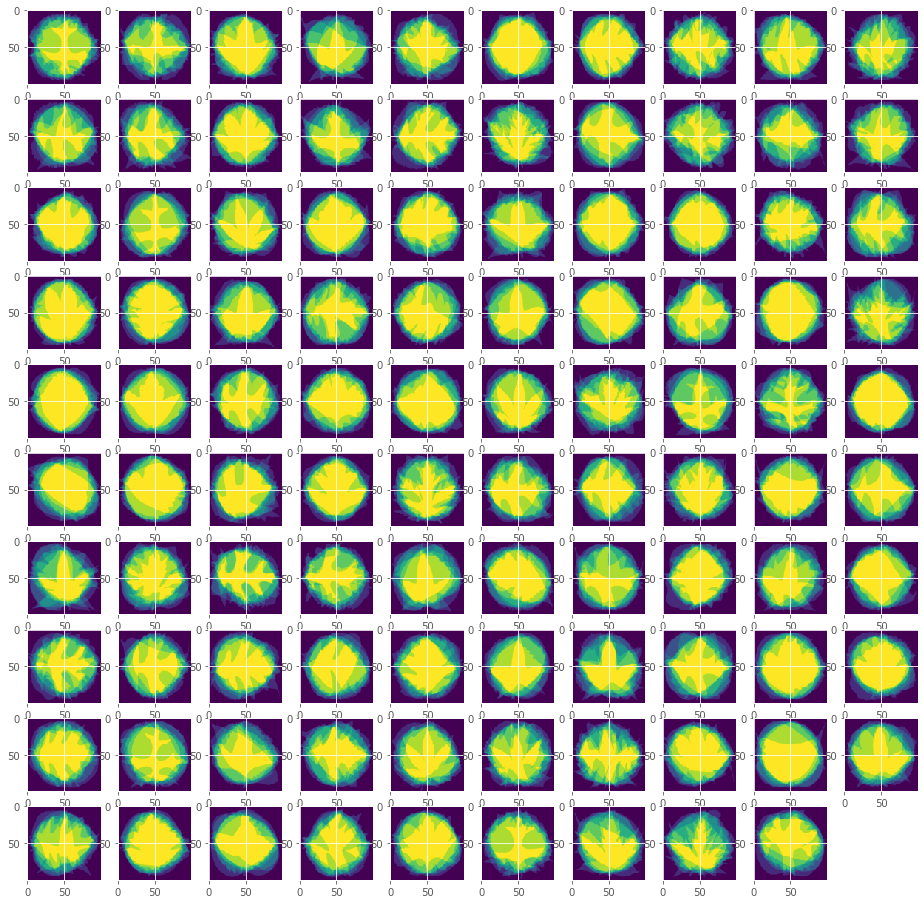

In [38]:
center_location = CNF.fit(imgs_train, y_train).centroids_
plt.figure(figsize=(16, 16))
for i in range(len(center_location)):
    plt.subplot(10, 10, i+1)
    plt.imshow(center_location[i].reshape(100, 100))

In [41]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(random_state=10)

In [42]:
MNB.fit(imgs_train, y_train)
pred = MNB.predict(imgs_test)
accuracy_score(pred, y_test)

0.010101010101010102

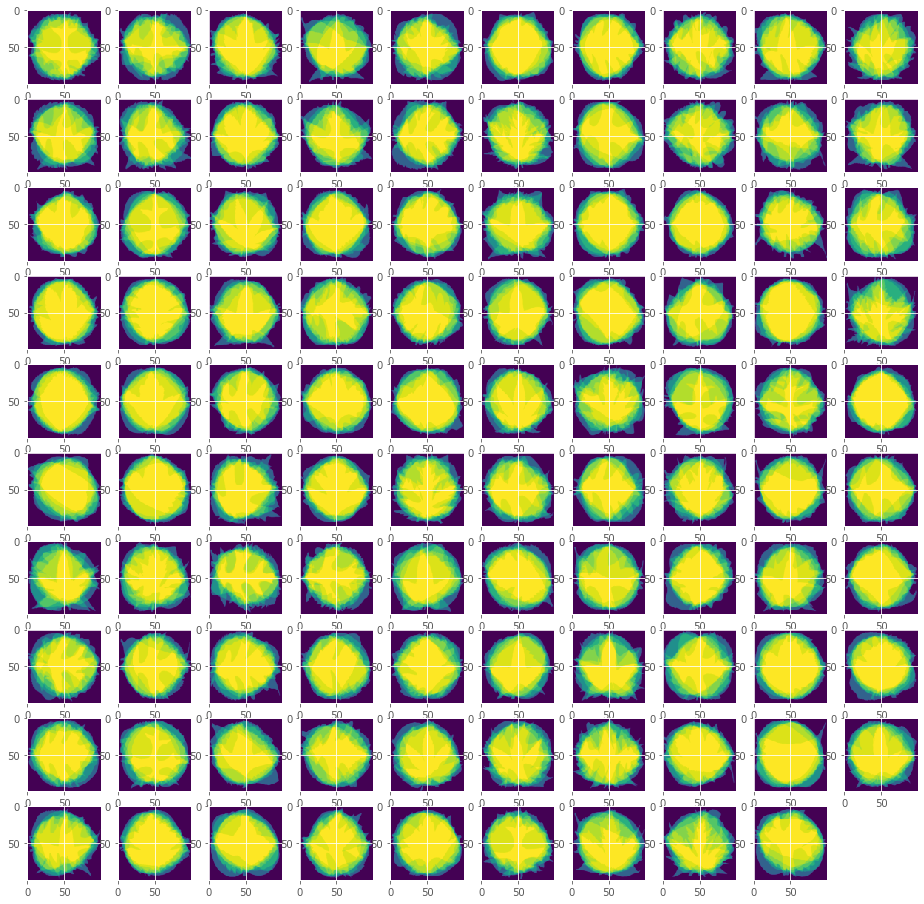

In [49]:
viz_MNB = MNB.fit(imgs_train, y_train).feature_log_prob_
plt.figure(figsize=(16, 16))
for i in range(len(viz_MNB)):
    plt.subplot(10, 10, i+1)
    plt.imshow(viz_MNB[i].reshape(100, 100))

In [46]:
from sklearn.linear_model import LogisticRegression
CLR = LogisticRegression(multi_class='multinomial', random_state = 10)

In [47]:
CLR.fit(imgs_train, y_train)
pred = CLR.predict(imgs_test)
accuracy_score(pred, y_test)

C:\Users\481\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.005050505050505051

C:\Users\481\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


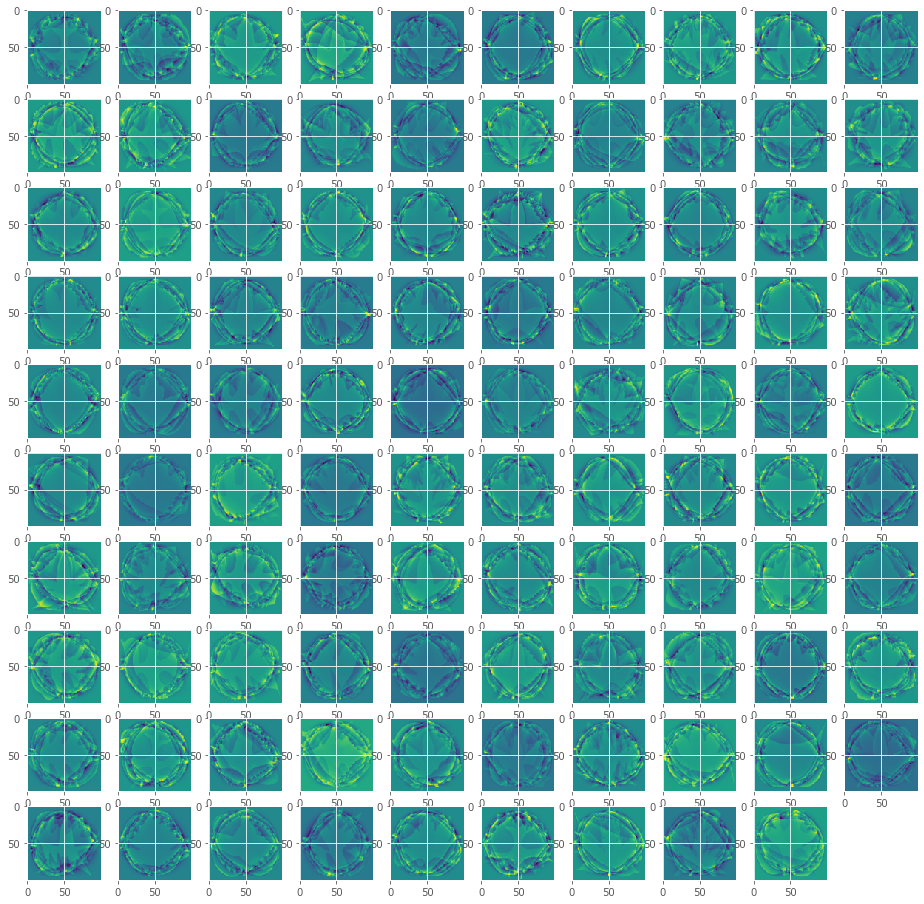

In [51]:
viz_CLR = CLR.fit(imgs_train, y_train).coef_
plt.figure(figsize=(16, 16))
for i in range(len(viz_CLR)):
    plt.subplot(10, 10, i+1)
    plt.imshow(viz_CLR[i].reshape(100, 100))

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

## Ответ

Всё фатально ужасно. Очевидно, я неверно закодировал изображения, связывая их с индексами классов табличных данных. Именно поэтому качество болтается между 0.5% и 1%, что по сути является случайным угадыванием, при отображении классов которых отчётливо видны двойные-тройные листки, перемешавшиеся друг в друге. Сейчас уже нет времени и желания переделывать это, очевидно, за этот пункт будет 0 :)

Лучше работает Байесовский классификатор, но ситуация не очень всё равно.
Центры кластеров похожи на листьев-мутантов, сочетающих в себе несколько традиционных листьев.
Вообще, логистическая регрессия отражает веса, которые идут по ободку очертаний листьев, что подтверждает выдвинутую ранее гипотезу о весомой доле окончаний листков в верной классификации. Поэтому место, где стандартное отклонение наибольшее, будет наиболее важным для анализа. Поэтому для каждого класса наибольшим весом обладают именно пиксели, идущие по ободку листа.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [22]:
num_components = 2**np.arange(10)

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

In [52]:
from sklearn.ensemble import RandomForestClassifier
CRF = RandomForestClassifier(n_jobs=-1, random_state=10)

In [53]:
CRF.fit(X_train, y_train)
pred = CRF.predict(X_test)
accuracy_score(y_test, pred)

0.9696969696969697

Качество случайного леса с базовыми параметрами примерно в 192 раза лучше, чем качество на изображениях, поскольку имеющиеся в таблице параметры являются крайне показательными индикаторами различия в классах, что является идеальной наводкой для решения задачи, которую аналитики обычно пытаются выудить сами на протяжении крайне долго периода времени (это по сути и является самой тяжёлой частью работы над той или иной задачи, сделать fit/predict любой дурак сможет (я)). Я думаю, что если бы я грамотно закодировал изображения, у табличных данных качество всё равно было бы лучше, поскольку далеко не все параметры можно было бы вывести из пикселей (как минимум толщина листьев могла бы остаться неизвестной). 

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [60]:
grid_searcher_CRF = GridSearchCV(
    CRF,
    param_grid={
        'max_features': ['auto', 'log2'],
        'max_leaf_nodes': [10, 30, 50, 100, 200, 500],
        'max_depth': [1, 3, 5, 8, 10, 30, 50, 70],  
        'min_samples_leaf': [1, 2, 5, 10], 
    },
    cv=StratifiedKFold(n_splits=4), n_jobs=-1
)
grid_searcher_CRF.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 8, 10, 30, 50, 70],
                         'max_features': ['auto', 'log2'],
                         'max_leaf_nodes': [10, 30, 50, 100, 200, 500],
                         'min_samples_leaf': [1, 2, 5, 10]})

In [61]:
grid_searcher_CRF.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': 200,
 'min_samples_leaf': 1}

In [62]:
accuracy_score(grid_searcher_CRF.predict(X_test), y_test)

0.9747474747474747

Видно, что качество улучшилось на 0.5%. Примечательно, что если задать cv=2 без stratifiedKfold у меня получилось качество около 98% - совпадение или случайность???